theta: [[-1.00671348e-16  8.84765988e-01 -5.31788197e-02]]


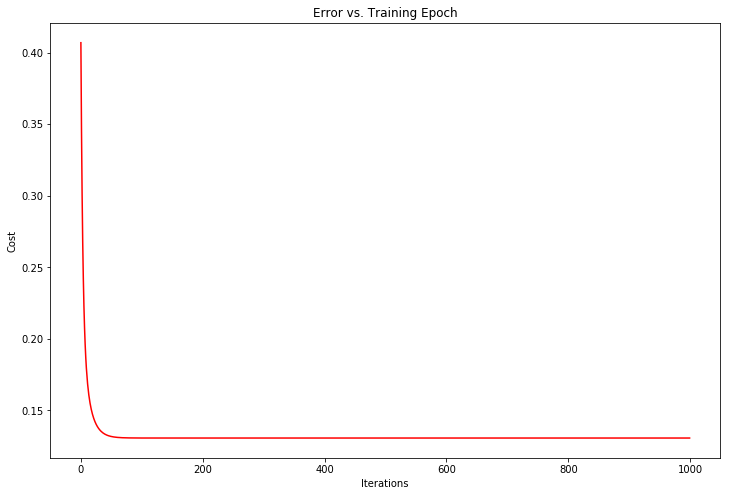

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def computeCost(X, y, theta):#代价函数 最小二乘法
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))
def gradientDescent(X,y,theta,alpha,iters): #梯度下降函数
    tmp = np.matrix(np.zeros(theta.shape)) 
    cost = np.zeros(iters) 
    m = X.shape[0]
    for i in range(iters): 
        tmp = theta - ( alpha / m )*( X * theta.T - y ).T * X
        #X（97，2），theta.T（2，1），y（97，1）
        theta = tmp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

path = 'ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['size','bedrooms','Price'])
data2.head()

data2 = (data2 - data2.mean()) / data2.std()
data2.head()

data2.insert(0, 'ones', 1)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta= np.matrix(np.array([0,0,0]))


iters= 1000
alpha= 0.1
final_theta,cost2 = gradientDescent(X2,y2,theta,alpha,iters)
computeCost(X2,y2,final_theta) #0.13068648053904197
print("theta:",final_theta)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()